## Wikipedia Wordcloud
A wordcloud (or tag cloud) is a [visual representation of text data](https://en.wikipedia.org/wiki/Tag_cloud) where words and phrases are arranged and sized based on their relative freuncy. In this exercise, you will use the python packages [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/), [requests](https://requests.readthedocs.io/en/master/) and [Wordcloud](https://amueller.github.io/word_cloud/index.html) to scrape a random wikipedia page's text and generate a word cloud based on it.

## Concepts Illustrated
* Web Scraping
* Installing and Importing Packages

First, import BeautifulSoup, requests, Wordcloud, and MatPlotLib. We use the first two for web scraping and the last two for generating the word cloud and displaying it. Of course, you will need to install these with pip before you can import them.

In [ ]:
!pip install wordcloud

In [1]:
import bs4 as bs
import requests
from wordcloud import WordCloud, random_color_func
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'wordcloud'

Next, write a method that uses requests to get the contents of a given url and convert this to a BeautifulSoup object. 

In [4]:
def get_soup(url):
    source = requests.get(url).text
    soup = bs.BeautifulSoup(source,'html.parser')
    return soup

Now, write another method that takes in a BeautifulSoup object as input. This method should assume this BeautifulSoup object is of a wikipedia page and return a string containing the page's name. There are a few ways to do this, since wikipedia stores this info in multiple places.

In [5]:
def get_title(soup):
    title = soup.find("title").text
    return title[:title.rindex("-") - 1]

Write another, similar method to the previous method, taking in a BeautifulSoup object as input. This method should assume this BeautifulSoup object is of a wikipedia page and return a string containing the page's main contents. This string should only contain the text of the wikipedia page and not things like the sidebar, which are part of the layout of all wikipedia pages. This will require you investigate a few wikipedia page's html so that you can understand their structure.

In [6]:
def get_text(soup):
    content = soup.find(id="mw-content-text")
    return content.text

Write one more function, which takes in a bunch of text and a title and generates a word cloud with a random color scheme, with the title at the center. The function should then display the word cloud using matplotlib. 

In [41]:
def show_wordcloud(title, content):
    wordcloud = WordCloud(
        color_func=random_color_func,
        background_color=random_color_func(),
        width=1000,
        height=1000
    ).generate(content)
    plt.figure(figsize=(30,30))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Now, use the four functions to generate a word cloud of a random wikipedia page. Wikipedia already has a system for getting a random wikipedia page; you should be able to pass the url of that wikipedia endpoint to your first function. This should only take 4 lines.

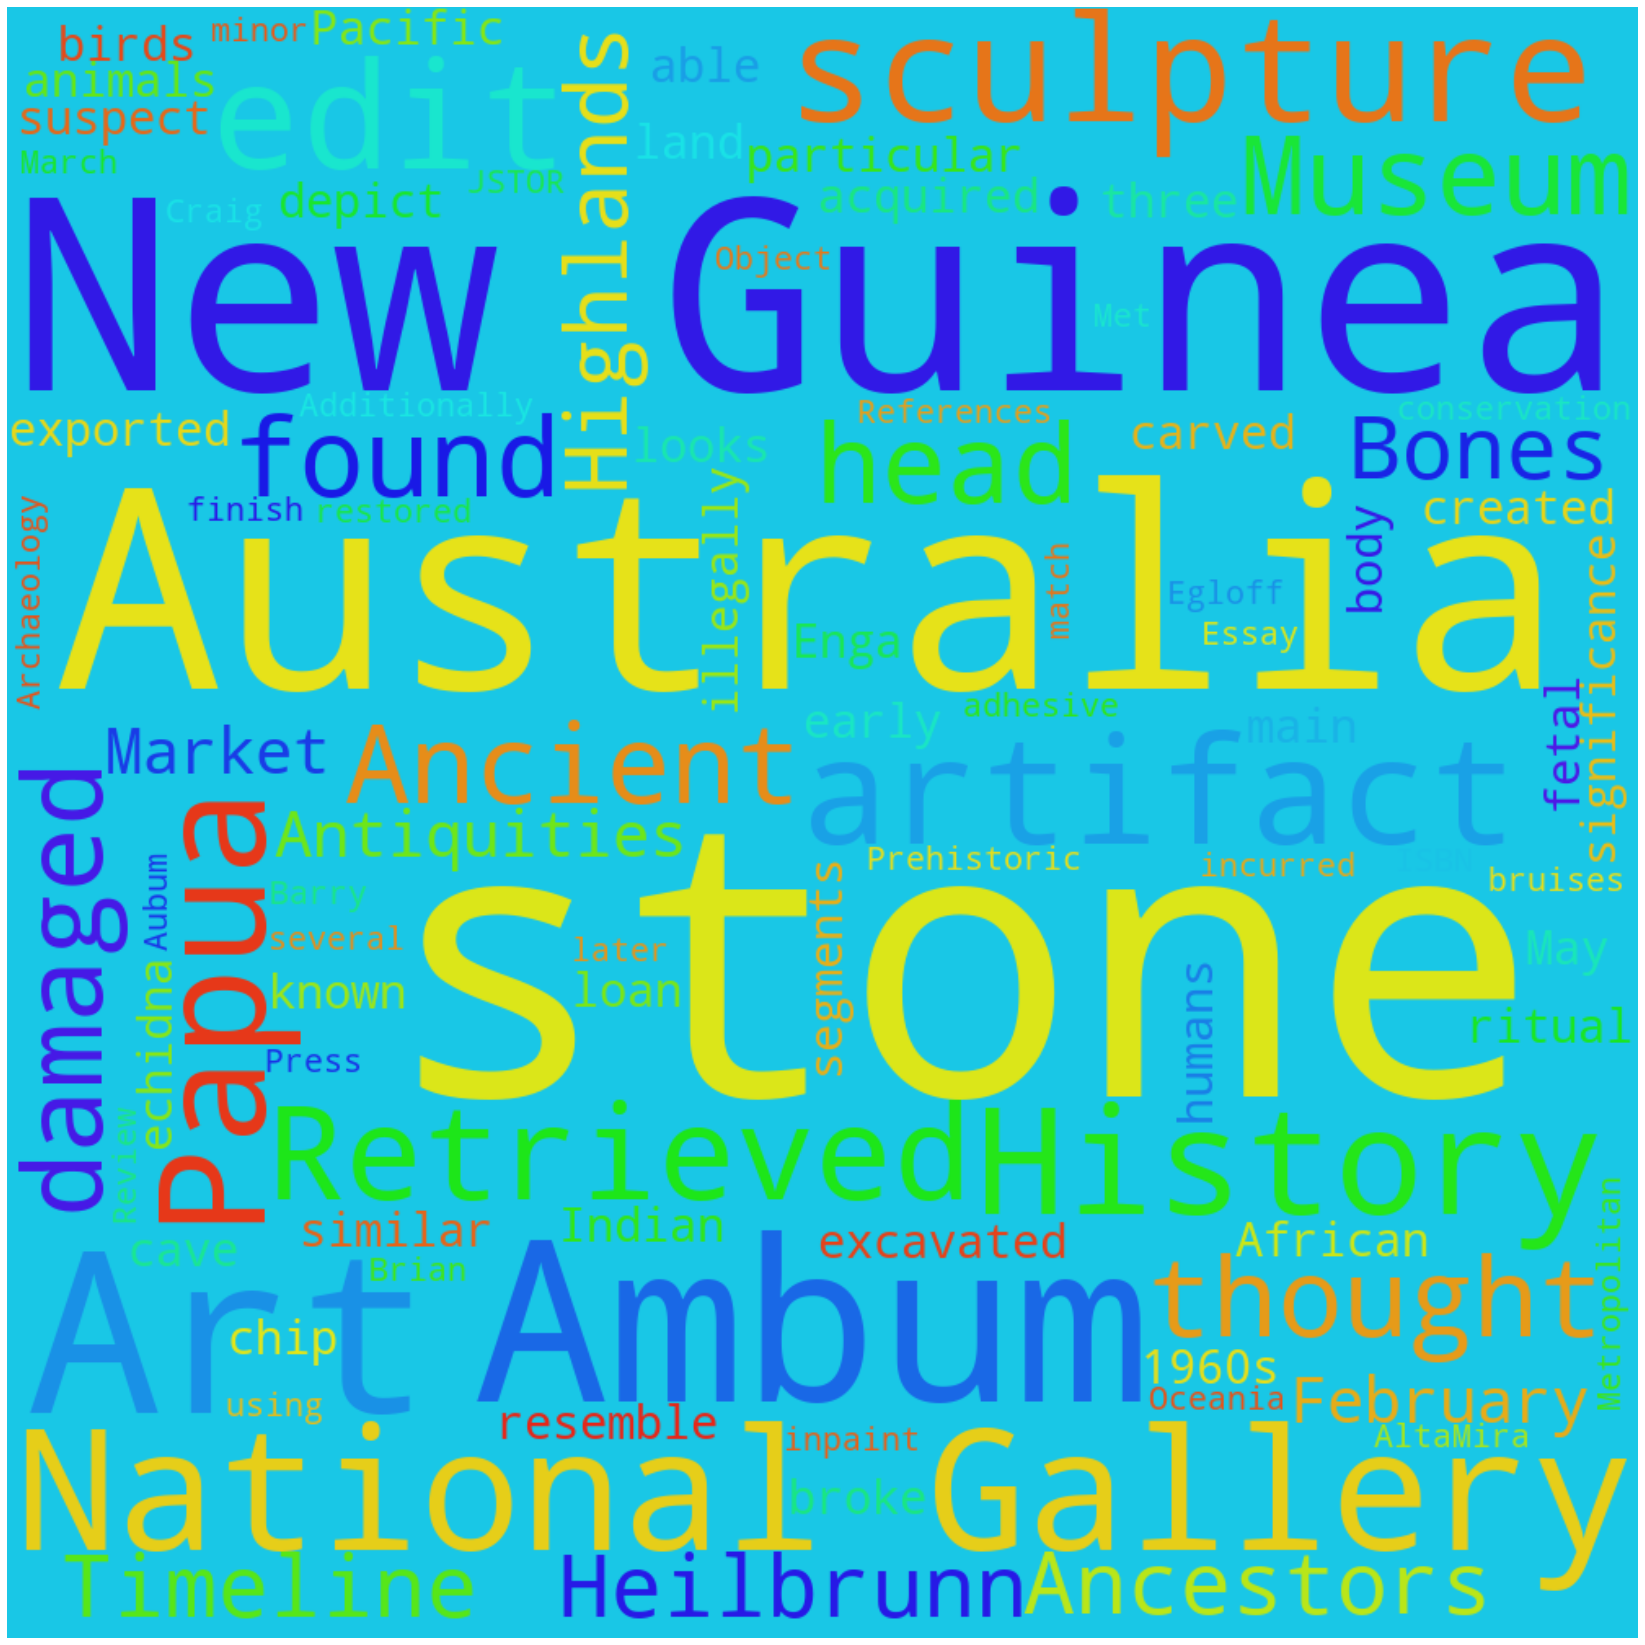

In [42]:
soup = get_soup("https://en.wikipedia.org/wiki/Special:Random")
title = get_title(soup)
content = get_text(soup)
show_wordcloud(title, content)